In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [3]:
sportsmen = '/Users/eva/Documents/Учеба/jupnote/athlete_events.csv'
df = pd.read_csv(sportsmen, sep=",")

In [4]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
df.pop('ID')

0              1
1              2
2              3
3              4
4              5
           ...  
271111    135569
271112    135570
271113    135570
271114    135571
271115    135571
Name: ID, Length: 271116, dtype: int64

In [6]:
df.pop('Name')
df.pop('Age')
df.pop('Team')
df.pop('NOC')
df.pop('Games')
df.pop('Year')
df.pop('Season')
df.pop('City')
df.pop('Sport')
df.pop('Event')
df.pop('Medal')

0          NaN
1          NaN
2          NaN
3         Gold
4          NaN
          ... 
271111     NaN
271112     NaN
271113     NaN
271114     NaN
271115     NaN
Name: Medal, Length: 271116, dtype: object

In [7]:
df

,Sex,Height,Weight
0,M,180.0,80.0
1,M,170.0,60.0
2,M,NaN,NaN
3,M,NaN,NaN
4,F,185.0,82.0
...,...,...,...
271111,M,179.0,89.0
271112,M,176.0,59.0
271113,M,176.0,59.0
271114,M,185.0,96.0


In [8]:
df.dropna(subset=['Height'], inplace=True)
df.dropna(subset=['Weight'], inplace=True)

In [9]:
df

,Sex,Height,Weight
0,M,180.0,80.0
1,M,170.0,60.0
4,F,185.0,82.0
5,F,185.0,82.0
6,F,185.0,82.0
...,...,...,...
271111,M,179.0,89.0
271112,M,176.0,59.0
271113,M,176.0,59.0
271114,M,185.0,96.0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x=df.iloc[:, 1:3]
y=df['Sex']

In [12]:
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)

In [13]:
# Размер обучающей выборки
df_X_train.shape, df_y_train.shape

((165482, 2), (165482,))

In [14]:
# Размер тестовой выборки
df_X_test.shape, df_y_test.shape

((41371, 2), (41371,))

In [15]:
np.unique(df_y_train)

array(['F', 'M'], dtype=object)

In [16]:
np.unique(df_y_test)

array(['F', 'M'], dtype=object)

In [17]:
from typing import Dict, Tuple

In [18]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [19]:
print_class_proportions(y)

Метка 	 Количество 	 Процент встречаемости
F 	 66729 	 	 32.26%
M 	 140124 	 	 67.74%


In [20]:
print_class_proportions(df_y_train)

Метка 	 Количество 	 Процент встречаемости
F 	 53384 	 	 32.26%
M 	 112098 	 	 67.74%


In [21]:
print_class_proportions(df_y_test)

Метка 	 Количество 	 Процент встречаемости
F 	 13345 	 	 32.26%
M 	 28026 	 	 67.74%


In [22]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [23]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj

KNeighborsClassifier(n_neighbors=3)

In [24]:
df_X_test.shape

(41371, 2)

In [25]:
KNeighborsClassifierObj.fit(df_X_train, df_y_train)
result3 = KNeighborsClassifierObj.predict(df_X_test)

In [26]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [27]:
accuracy_score(df_y_test, result3)

0.7600976529452999

In [28]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    print('Общий показатель метрики', accuracy_score(y_true, y_pred))
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [29]:
print_accuracy_score_for_classes(df_y_test, result3)

Общий показатель метрики 0.7600976529452999
Метка 	 Accuracy
F 	 0.6107905582615212
M 	 0.831192464140441


In [30]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifierObj.fit(df_X_train, df_y_train)
result10 = KNeighborsClassifierObj.predict(df_X_test)

In [31]:
print_accuracy_score_for_classes(df_y_test, result10)

Общий показатель метрики 0.7830122549612047
Метка 	 Accuracy
F 	 0.664518546272012
M 	 0.8394348105330764


In [32]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=13)
KNeighborsClassifierObj.fit(df_X_train, df_y_train)
result13 = KNeighborsClassifierObj.predict(df_X_test)
print_accuracy_score_for_classes(df_y_test, result13)

Общий показатель метрики 0.7838340866790747
Метка 	 Accuracy
F 	 0.6300487073810416
M 	 0.8570613002212232


Попробуем использовать метрику balanced_accuracy_score

In [33]:
balanced_accuracy_score(df_y_test, result3)

0.720991511200981

In [34]:
balanced_accuracy_score(df_y_test, result10)

0.7519766784025442

In [35]:
balanced_accuracy_score(df_y_test, result13)

0.7435550038011324

Действительно k=10 выглядит оптимальней

In [36]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [37]:
cll10=KNeighborsClassifier(n_neighbors=10)
cll10.fit(df_X_train, df_y_train)

KNeighborsClassifier(n_neighbors=10)

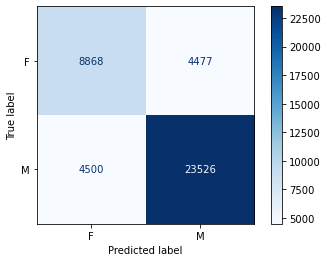

In [38]:
plot_confusion_matrix(cll10, df_X_test, df_y_test, 
                    cmap=plt.cm.Blues)

In [44]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn

In [52]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [53]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='balanced_accuracy')
clf_rs.fit(df_X_train, df_y_train)

CPU times: user 47.2 s, sys: 172 ms, total: 47.4 s
Wall time: 47.5 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='balanced_accuracy')

In [54]:
clf_rs.best_score_, clf_rs.best_params_

(0.7521229603685724, {'n_neighbors': 50})

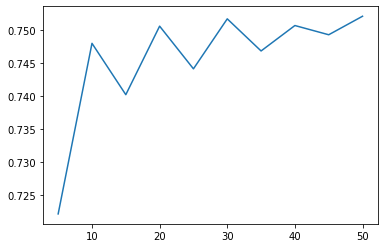

In [85]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

In [57]:
from sklearn.model_selection import cross_val_score, cross_validate

In [60]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         x, y, cv=5)

In [61]:
scores

array([0.760146  , 0.76203137, 0.75888908, 0.7597051 , 0.75288857])

In [63]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold

In [76]:
skf = ShuffleSplit(n_splits=5, test_size=0.25)
for train, test in skf.split(x, y):
    print("%s %s" % (train, test))

[164666  36608  48746 ...  55446 113374  33049] [124135 161991  22585 ...  87784   9745  54197]
[ 65317 202839  64021 ...  34320 104530 106371] [ 72908  70083  86101 ...  53120 174095  22853]
[ 42305 134611 109625 ... 112528  40335  14185] [139400 109048  19336 ... 206634 127343   7579]
[ 34000 196611 124964 ...  19788  35822 138899] [100095  96124  70727 ... 166846  28467  57657]
[ 25984 141243 154080 ... 114155 147663 138136] [157791  19986  96739 ...  54298  88082 179165]


In [77]:
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                         x, y, cv=skf)

In [78]:
scores1

array([0.76863132, 0.77371698, 0.77829988, 0.77795181, 0.77491588])

In [79]:
balanced_accuracy_score(df_y_test, result10)

0.7519766784025442

In [83]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=50)
KNeighborsClassifierObj.fit(df_X_train, df_y_train)
result50 = KNeighborsClassifierObj.predict(df_X_test)
balanced_accuracy_score(df_y_test, result50)

0.749891980622714